### UNDERSTANDING THE PROBLEM STATEMENT 

Google and Aravind Eye Hospital work: https://venturebeat.com/2019/02/25/google-works-with-aravind-eye-hospital-to-deploy-ai-that-can-detect-eye-disease/

Data Source: https://www.kaggle.com/c/diabetic-retinopathy-detection

# IMPORT LIBRARIES & DATASETS

In [55]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras_tuner import Hyperband

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
# list all the files and directories
os.listdir('./train')

['Mild', 'Moderate', 'Proliferate_DR', 'Severe', 'No_DR']

In [3]:
os.listdir(os.path.join('train', 'Mild'))

['2d7666b8884f.png',
 '50840c36f0b4.png',
 '30cab14951ac.png',
 'a8582e346df0.png',
 'cab3dfa7962d.png',
 '35d6c4c50072.png',
 '67f5d89da548.png',
 '6b07971c3bf6.png',
 '7116128c65ab.png',
 'e38f3a65b02b.png',
 'd85588ff2ebd.png',
 'a19ecd0a706e.png',
 '49c5e7f6b8d2.png',
 '2f2e1949ad56.png',
 '35aa7f5c2ec0.png',
 '55eac26bd383.png',
 'af133a85ea0c.png',
 '80a02014b418.png',
 '384631079d1e.png',
 'e25ccfe38e44.png',
 '6ea07d19b4ce.png',
 '8273fdb4405e.png',
 'ead23cc922ed.png',
 '1e8a1fdee5b9.png',
 'c102db7634d8.png',
 '1b329a127307.png',
 '0f495d87656a.png',
 '58184d6fd087.png',
 '25e9fd872182.png',
 'c4a8f2fcf6e8.png',
 'ee78ce914066.png',
 'e9ff9352ccb3.png',
 'cb2f3c5d71a7.png',
 '5090917a2676.png',
 '79ce83c07588.png',
 'dbd062558b81.png',
 '5671eb95512b.png',
 '00cb6555d108.png',
 '96a9706b8534.png',
 'ea15a290eb96.png',
 '36677b70b1ef.png',
 'eba3acc42197.png',
 'f481f76a6b75.png',
 'f6f7dba7104d.png',
 '821789e9053f.png',
 'a75bab2463d4.png',
 '6028a575dc27.png',
 'a47432cd41e

## Checking the number of images in the dataset


In [4]:
import os
import glob

train = []
label = []

# list of files with the specified pattern
for class_dir in glob.glob('./train/*'):
    class_name = os.path.basename(class_dir)
    # Only add files with image extensions
    for img_file in glob.glob(os.path.join(class_dir, '*.[pjJ][npP][gG]')):
        train.append(img_file)
        label.append(class_name)

print('Number of train images are : {} \n'.format(len(train)))


Number of train images are : 3662 



In [6]:
train

['./train/Mild/2d7666b8884f.png',
 './train/Mild/50840c36f0b4.png',
 './train/Mild/30cab14951ac.png',
 './train/Mild/a8582e346df0.png',
 './train/Mild/cab3dfa7962d.png',
 './train/Mild/35d6c4c50072.png',
 './train/Mild/67f5d89da548.png',
 './train/Mild/6b07971c3bf6.png',
 './train/Mild/7116128c65ab.png',
 './train/Mild/e38f3a65b02b.png',
 './train/Mild/d85588ff2ebd.png',
 './train/Mild/a19ecd0a706e.png',
 './train/Mild/49c5e7f6b8d2.png',
 './train/Mild/2f2e1949ad56.png',
 './train/Mild/35aa7f5c2ec0.png',
 './train/Mild/55eac26bd383.png',
 './train/Mild/af133a85ea0c.png',
 './train/Mild/80a02014b418.png',
 './train/Mild/384631079d1e.png',
 './train/Mild/e25ccfe38e44.png',
 './train/Mild/6ea07d19b4ce.png',
 './train/Mild/8273fdb4405e.png',
 './train/Mild/ead23cc922ed.png',
 './train/Mild/1e8a1fdee5b9.png',
 './train/Mild/c102db7634d8.png',
 './train/Mild/1b329a127307.png',
 './train/Mild/0f495d87656a.png',
 './train/Mild/58184d6fd087.png',
 './train/Mild/25e9fd872182.png',
 './train/Mild

In [5]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

<Axes: xlabel='count'>

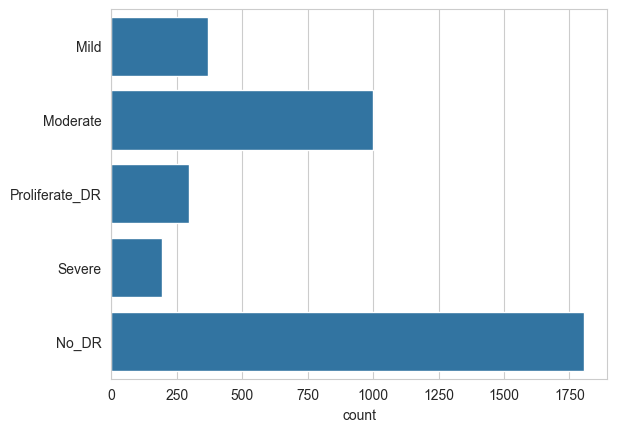

In [46]:
sns.countplot(label)

# DATA EXPLORATION AND DATA VISUALIZATION

### Visualizing 5 images for each class in the dataset

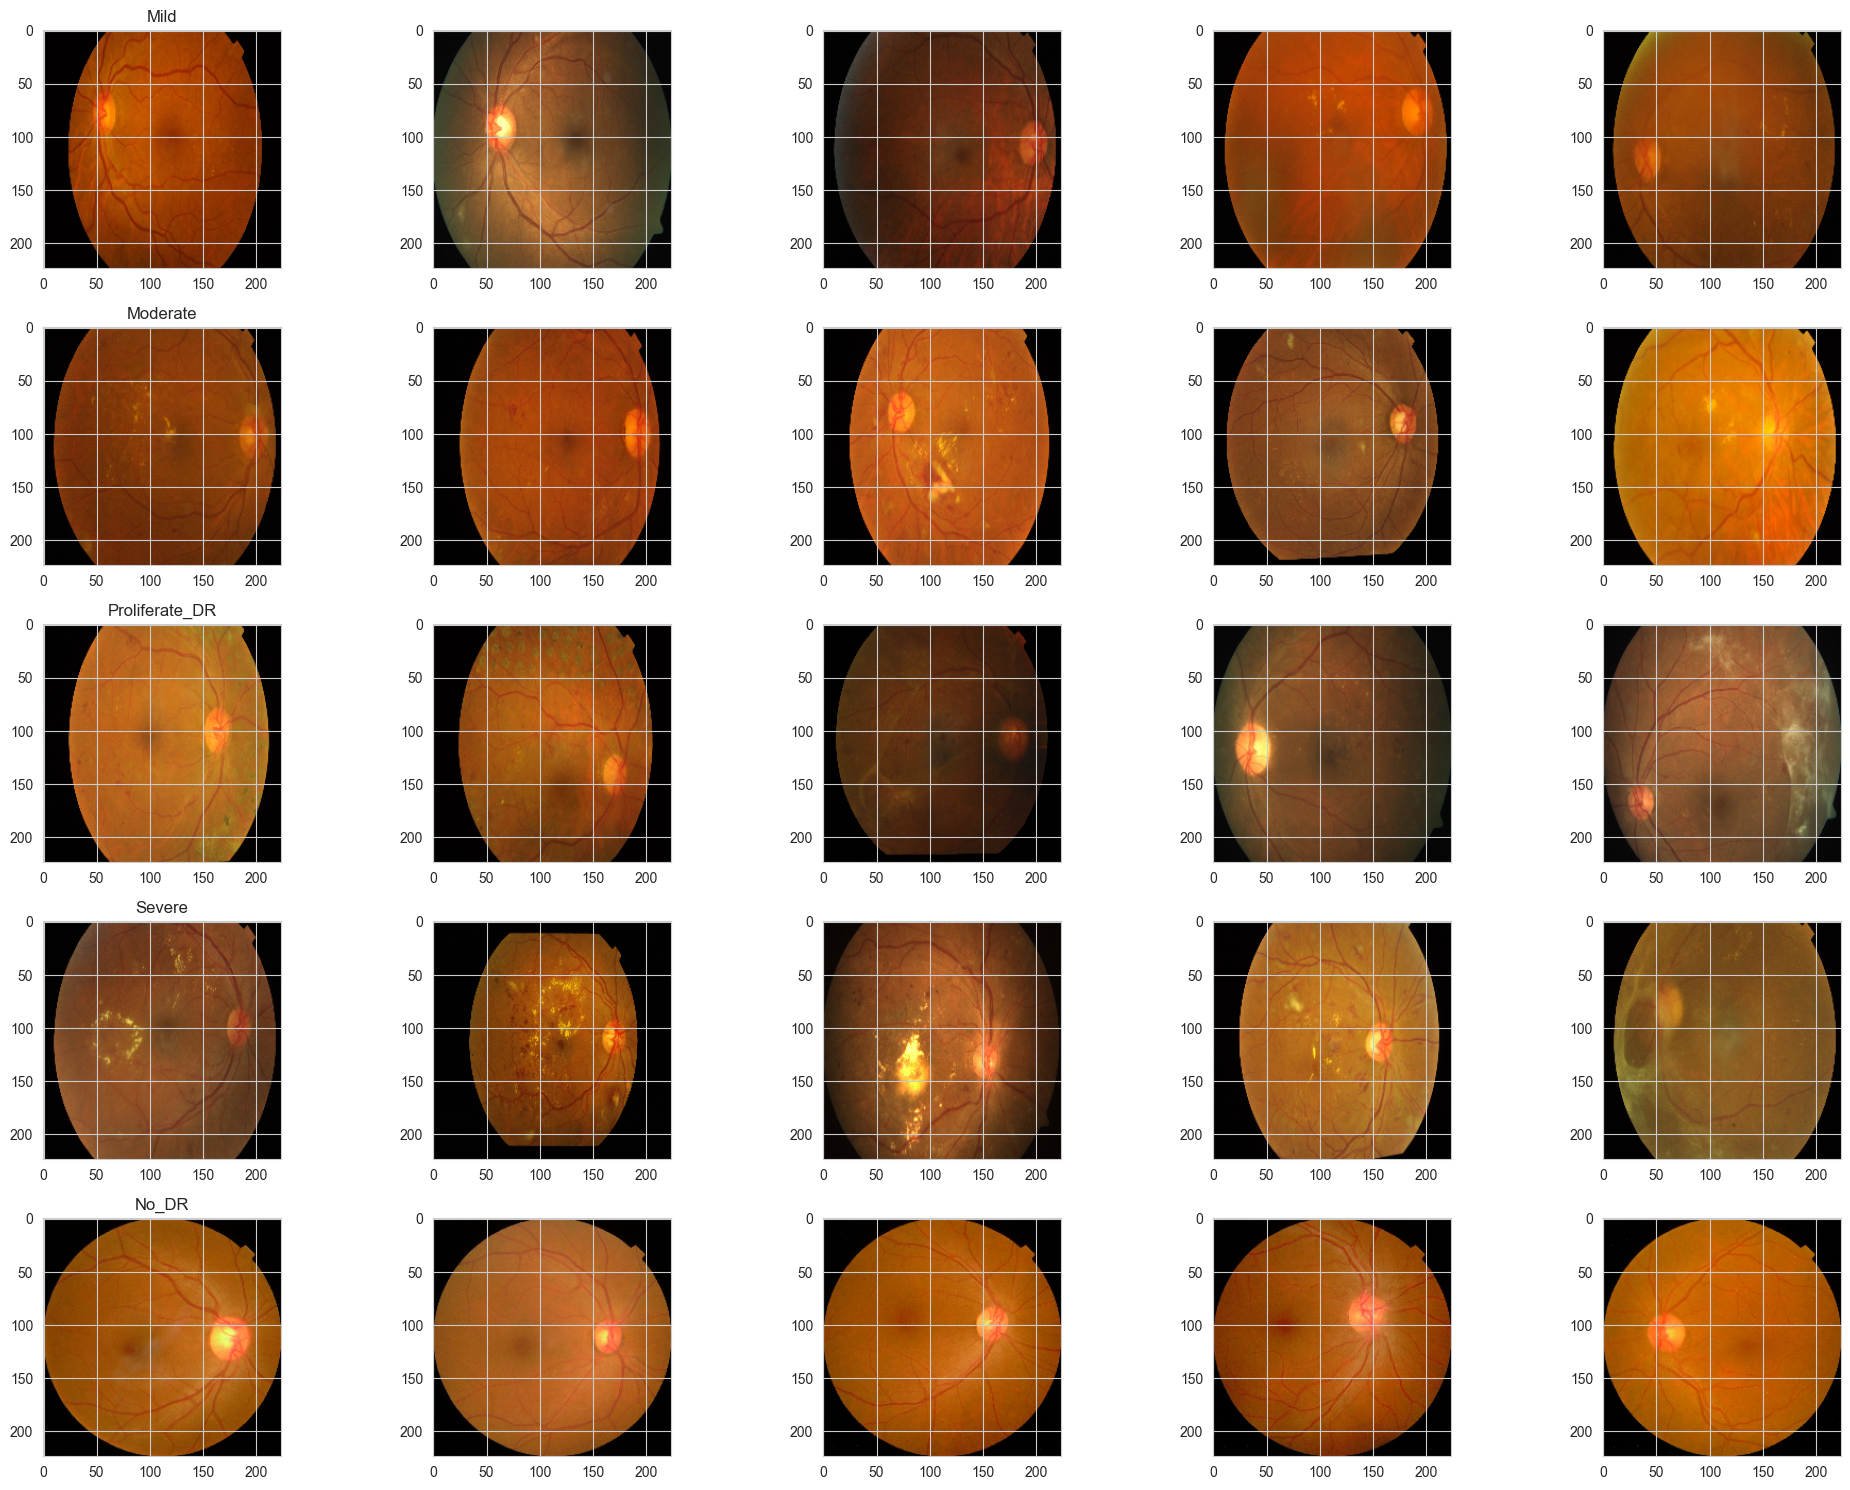

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Number of samples to display per class
samples_per_class = 5

train_path = './train'

#list of class directories
class_dirs = os.listdir(train_path)
num_classes = len(class_dirs)

fig, axs = plt.subplots(num_classes, samples_per_class, figsize=(20, num_classes * 3))

# Loop through each class directory
for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(train_path, class_dir)
    # list of images in the class directory
    image_files = os.listdir(class_path)

    for j in range(samples_per_class):
        img_path = os.path.join(class_path, image_files[j])
        img = Image.open(img_path)

        # Plot the image in the corresponding subplot
        axs[i, j].imshow(img)
        axs[i, j].axis('on')

        # Adding a title for the first image in each row for each class
        if j == 0:
            axs[i, j].set_title(class_dir, fontsize=12)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()


### Checking the number of img in each class in the dataset


In [ ]:
train_path = './train'

classes = os.listdir(train_path)

# Count the number of images in each class
num_images = [len(os.listdir(os.path.join(train_path, class_dir))) for class_dir in classes]

# Calculate the total number of images
total_images = sum(num_images)

# Number of images and percentages for each class
for class_name, count in zip(classes, num_images):
    percentage = (count / total_images) * 100
    print(f'Number of images in "{class_name}" = {count} ({percentage:.2f}%)')


print(f'\nTotal images: {total_images}')


In [ ]:
# Creating a pie chart showing the percentage of samples per class
colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=classes, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percentage of Samples Per Class', fontsize=18)
plt.axis('equal')

plt.show()

In [15]:
import pandas as pd

retina_df = pd.DataFrame({
    'Image': train,   
    'Labels': label  
})


retina_df


Image Labels
0      ./train/Mild/2d7666b8884f.png   Mild
1      ./train/Mild/50840c36f0b4.png   Mild
2      ./train/Mild/30cab14951ac.png   Mild
3      ./train/Mild/a8582e346df0.png   Mild
4      ./train/Mild/cab3dfa7962d.png   Mild
...                              ...    ...
3657  ./train/No_DR/6b30767595d8.png  No_DR
3658  ./train/No_DR/2b4c7b5f1f1e.png  No_DR
3659  ./train/No_DR/ab78a66dee6a.png  No_DR
3660  ./train/No_DR/79ade634c633.png  No_DR
3661  ./train/No_DR/7a77c3eb468c.png  No_DR

[3662 rows x 2 columns]

# DATA AUGMENTATION AND CREATE DATA GENERATOR

In [16]:
# # To avoid Avoid Bias >>> Shuffling the data and spliting it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

## Preparing image data for training and testing a machine learning model.
We used (ImageDataGenerator) to prepare our images for training and testing the model. 
#### For training, it normalizes the image pixels (makes their values between 0 and 1) and adds some random changes like tilting the images a little. This helps the model learn better and not get too fixed on specific details. It also splits the training data into two parts: one for training and one for checking how well the training is going (validation). 
#### For testing, it only normalizes the images without changing them, so we can see how well the model performs on clean, untouched data.

In [17]:
# Defining data generators for training and testing datasets

# The training data generator normalizes the pixel values (rescale), applies random shearing (shear_range) 
# to augment the data, and reserves 15% of the data for validation (validation_split).

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# The testing data generator only normalizes the pixel values (rescale) without any augmentations.

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


### As we add more layers to a network, it becomes harder to train because so there will be two potentional problems: 
##### Vanishing Gradients: The information that helps the network learn (gradients) gets smaller as it moves back through the layers, making the earlier layers stop learning.
##### Hard to Optimize: A deep network has to figure out very complicated changes, which can make training slow and less effective.

### Solution: Residual blocks are like giving the network a shortcut to skip over layers. This makes it easier to train and allows the network to learn better, even when it’s very deep. 

# BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [27]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPool2D
from tensorflow.keras.initializers import glorot_uniform

def convolutional_block(X, filters, stage):
    """Convolutional block for the ResNet architecture."""
    X_copy = X
    f1, f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPool2D((2, 2))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_conv_c')(X)

    # Short Path
    X_copy = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_conv_copy', kernel_initializer=glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2, 2))(X_copy)
    X_copy = BatchNormalization(axis=3, name=f'bn_{stage}_conv_copy')(X_copy)

    # Add and Activate
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

def identity_block(X, filters, stage, block):
    """Identity block for the ResNet architecture."""
    X_copy = X
    f1, f2, f3 = filters

    # Main Path
    X = Conv2D(f1, (1, 1), strides=(1, 1), name=f'res_{stage}_identity_{block}_a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_a')(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(3, 3), strides=(1, 1), padding='same', name=f'res_{stage}_identity_{block}_b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_b')(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), name=f'res_{stage}_identity_{block}_c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=f'bn_{stage}_identity_{block}_c')(X)

    # Add and Activate
    X = Add()([X, X_copy])
    X = Activation('relu')(X)

    return X

def res_block(X, filters, stage):
    """ResNet block consisting of a convolutional block followed by identity blocks."""
    # Convolutional Block
    X = convolutional_block(X, filters, stage)

    # Identity Blocks
    X = identity_block(X, filters, stage, block=1)
    X = identity_block(X, filters, stage, block=2)

    return X

In [58]:
def build_resnet(input_shape):
    """Builds a ResNet model using modular res_block."""
    # Input tensor shape
    X_input = Input(input_shape)

    # Zero-padding
    X = ZeroPadding2D((3, 3))(X_input)

    # 1 - stage
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # 2- stage
    X = res_block(X, filters=[64, 64, 256], stage=2)

    # 3- stage
    X = res_block(X, filters=[128, 128, 512], stage=3)

    # 4- stage
    X = res_block(X, filters=[256, 256, 1024], stage=4)

    # 5- stage (commented out in original code, uncomment if needed)
    # X = res_block(X, filters=[512, 512, 2048], stage=5)

    # Average Pooling
    X = AveragePooling2D((2, 2), name='Average_Pooling')(X)

    # Final layer
    X = Flatten()(X)
    X = Dense(5, activation='softmax', name='Dense_final', kernel_initializer=glorot_uniform(seed=0))(X)

    # Create the model
    model = Model(inputs=X_input, outputs=X, name='ResNet18')

    return model

# Defining input shape
input_shape = (256, 256, 3)

# Building model
model = build_resnet(input_shape)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

model.summary()


Model: "ResNet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 262, 262,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_159      │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_40    │ (None, 63, 63,    │          0 │ activation_159[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d_40… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_41    │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_41… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_160      │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_160[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_161      │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d_40… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_161[0… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_42    │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 4,987,525 (19.03 MB)

 Trainable params: 4,967,685 (18.95 MB)

 Non-trainable params: 19,840 (77.50 KB)

#### Now we have the roadmap of your model. 

# COMPILING AND TRAINING DEEP LEARNING MODEL

### Now we can prepare the model for training. 

In [63]:
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

In [64]:
# Stop training if validation loss does not improve for 15 consecutive epochs
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Save only the weights of the model with lower validation loss
checkpointer = ModelCheckpoint(filepath='weights.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.8775 - accuracy: 0.6502 - loss: 1.0951
Epoch 1: val_loss improved from inf to 1.42963, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - AUC: 0.8777 - accuracy: 0.6504 - loss: 1.0943 - val_AUC: 0.7575 - val_accuracy: 0.4952 - val_loss: 1.4296
Epoch 2/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - AUC: 0.8646 - accuracy: 0.5938 - loss: 1.1171

2024-11-25 19:26:03.314004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.42963 to 1.38237, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8646 - accuracy: 0.5938 - loss: 1.1171 - val_AUC: 0.7805 - val_accuracy: 0.6087 - val_loss: 1.3824
Epoch 3/10


2024-11-25 19:26:03.532351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.9267 - accuracy: 0.7304 - loss: 0.7778
Epoch 3: val_loss improved from 1.38237 to 1.36566, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - AUC: 0.9266 - accuracy: 0.7302 - loss: 0.7781 - val_AUC: 0.7290 - val_accuracy: 0.5000 - val_loss: 1.3657
Epoch 4/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:56 2s/step - AUC: 0.9316 - accuracy: 0.7188 - loss: 0.7302

2024-11-25 19:28:02.720106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss improved from 1.36566 to 1.34019, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9316 - accuracy: 0.7188 - loss: 0.7302 - val_AUC: 0.7481 - val_accuracy: 0.5217 - val_loss: 1.3402
Epoch 5/10


2024-11-25 19:28:02.948193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9436 - accuracy: 0.7715 - loss: 0.6704
Epoch 5: val_loss did not improve from 1.34019
77/77 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - AUC: 0.9436 - accuracy: 0.7715 - loss: 0.6704 - val_AUC: 0.7258 - val_accuracy: 0.5024 - val_loss: 1.4305
Epoch 6/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:57 2s/step - AUC: 0.9742 - accuracy: 0.8125 - loss: 0.4454

2024-11-25 19:30:21.710645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss did not improve from 1.34019
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9742 - accuracy: 0.8125 - loss: 0.4454 - val_AUC: 0.7075 - val_accuracy: 0.4783 - val_loss: 1.4031
Epoch 7/10


2024-11-25 19:30:21.937066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9596 - accuracy: 0.8007 - loss: 0.5654
Epoch 7: val_loss did not improve from 1.34019
77/77 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - AUC: 0.9596 - accuracy: 0.8006 - loss: 0.5658 - val_AUC: 0.7565 - val_accuracy: 0.4399 - val_loss: 1.3617
Epoch 8/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 1:53 1s/step - AUC: 0.9789 - accuracy: 0.8750 - loss: 0.4060

2024-11-25 19:32:28.118448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 1.34019
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9789 - accuracy: 0.8750 - loss: 0.4060 - val_AUC: 0.7786 - val_accuracy: 0.4348 - val_loss: 1.3562
Epoch 9/10


2024-11-25 19:32:28.340464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9689 - accuracy: 0.8064 - loss: 0.4943
Epoch 9: val_loss did not improve from 1.34019
77/77 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - AUC: 0.9689 - accuracy: 0.8064 - loss: 0.4944 - val_AUC: 0.7486 - val_accuracy: 0.4615 - val_loss: 1.4356
Epoch 10/10
 1/77 ━━━━━━━━━━━━━━━━━━━━ 2:04 2s/step - AUC: 0.9572 - accuracy: 0.8125 - loss: 0.5812

2024-11-25 19:34:38.507944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss improved from 1.34019 to 1.08922, saving model to weights.weights.h5
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9572 - accuracy: 0.8125 - loss: 0.5812 - val_AUC: 0.8698 - val_accuracy: 0.6957 - val_loss: 1.0892


2024-11-25 19:34:38.737369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


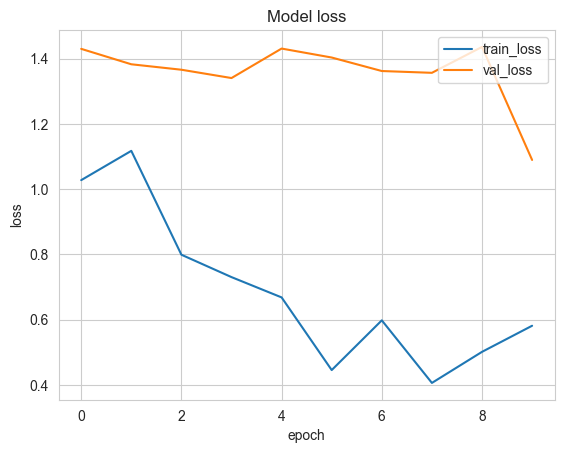

In [65]:
# Train for 10 epochs instead of 1
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 10, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


The model seems to be working well since both the training and validation losses are decreasing by the end.

## ASSESSING THE PERFORMANCE OF THE MODEL

In [66]:
# loading the saved best-trained weights into the model for use without retraining.
model.load_weights("retina_weights.hdf5")

In [67]:
# Assesing the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - AUC: 0.9683 - accuracy: 0.8281 - loss: 0.4968
Accuracy Test : 0.8167613744735718


In [68]:
# Assigning label to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [69]:
# Loading images and their predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Lists to store results
predictions = []
originals = []
images = []

# Iterating through the test dataset
for index, row in test.iterrows():
    # Open and resize the image
    img = PIL.Image.open(row['Image'])
    img = img.resize((256, 256))

    # Append the original image to the list
    images.append(img)

    # Convert the image to an array, normalize, and reshape
    img_array = np.asarray(img, dtype=np.float32) / 255.0
    img_array = img_array.reshape(1, 256, 256, 3)

    # Make predictions
    prediction_array = model.predict(img_array)
    predicted_label = labels[np.argmax(prediction_array)]

    # Append predicted and original labels
    predictions.append(predicted_label)
    originals.append(row['Labels'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [70]:
# Calculate the test accuracy
test_accuracy = accuracy_score(originals, predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.82


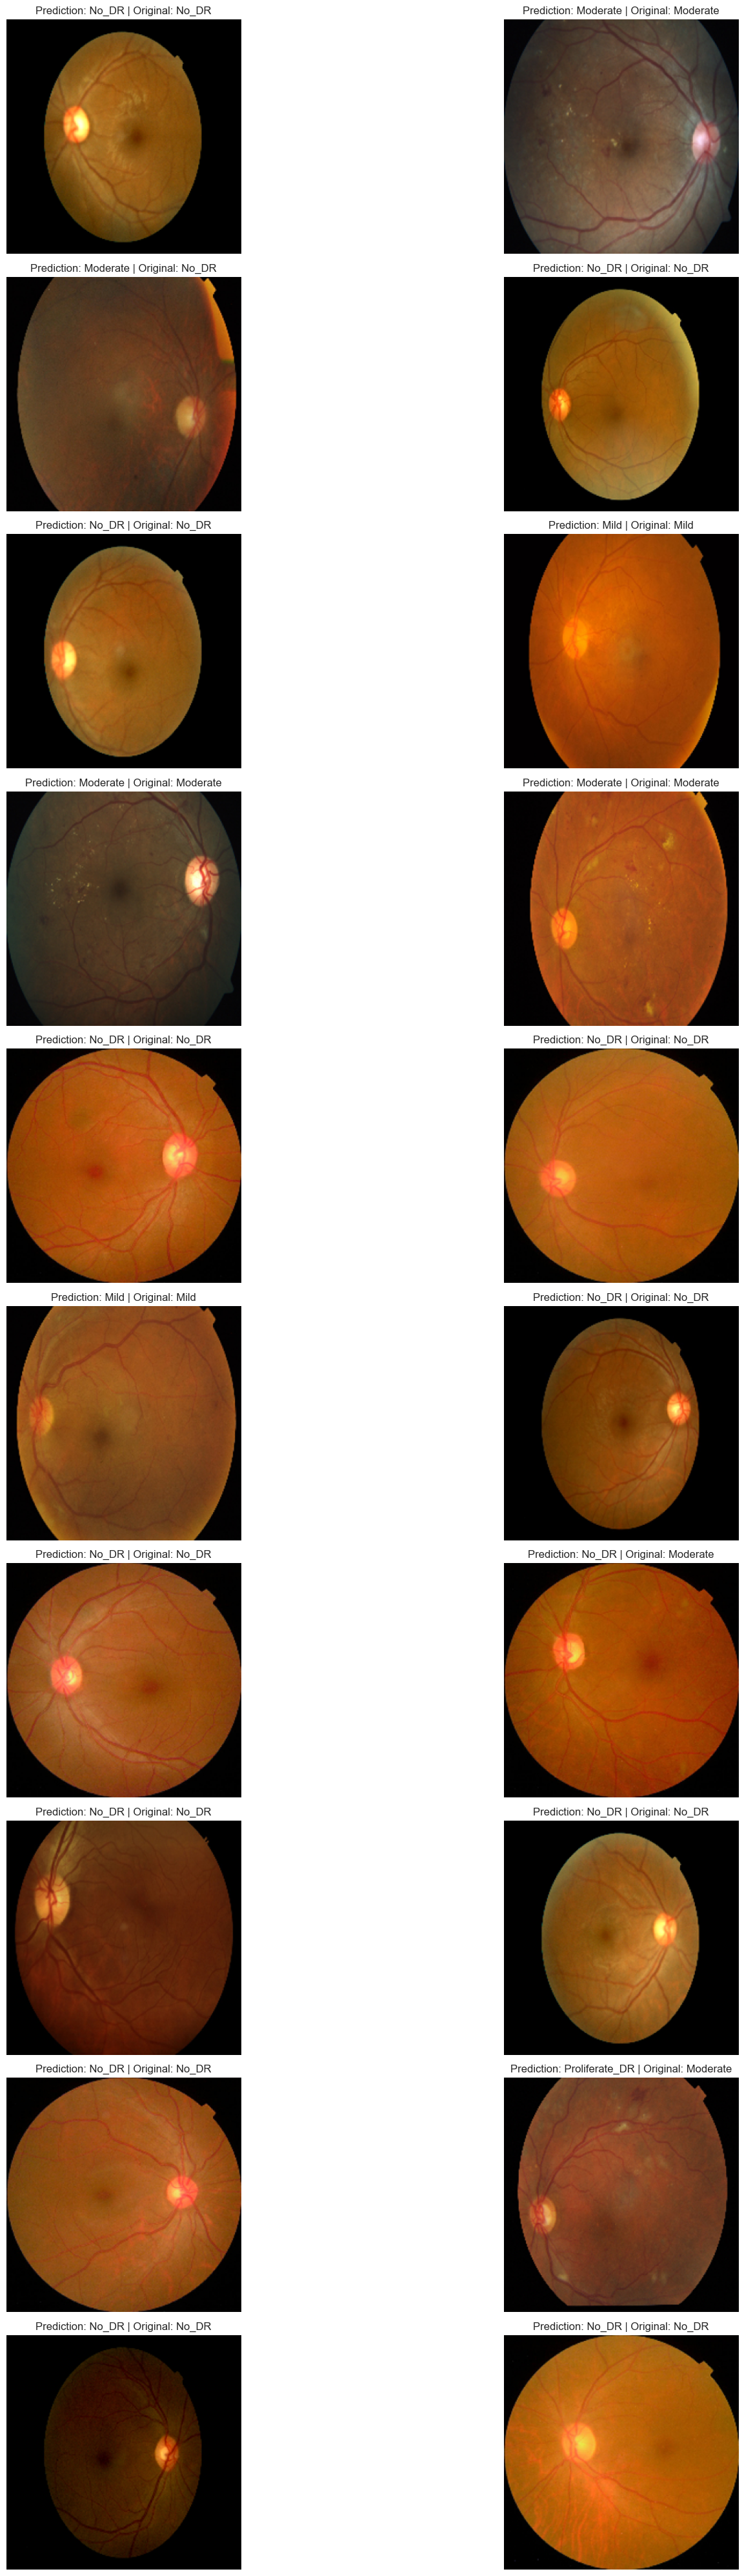

In [71]:
# Visualizing the results
import random
fig, axes = plt.subplots(10, 2, figsize=(20, 40))  # 10 rows and 2 columns
axes = axes.flatten()  # Flatten the axes for easy iteration

for i in range(20):
    # Select a random index
    random_index = random.randint(0, len(images) - 1)

    # Plot the image
    axes[i].imshow(images[random_index])
    axes[i].set_title(f"Prediction: {predictions[random_index]} | Original: {originals[random_index]}")
    axes[i].axis('off')  # Remove axis for better visualization

fig.tight_layout()
plt.show()


In [43]:
print(classification_report(np.asarray(original), np.asarray(prediction)))


                precision    recall  f1-score   support

          Mild       0.70      0.46      0.55        68
      Moderate       0.70      0.82      0.75       195
         No_DR       0.94      0.97      0.95       375
Proliferate_DR       0.61      0.59      0.60        58
        Severe       0.83      0.41      0.55        37

      accuracy                           0.82       733
     macro avg       0.76      0.65      0.68       733
  weighted avg       0.82      0.82      0.81       733



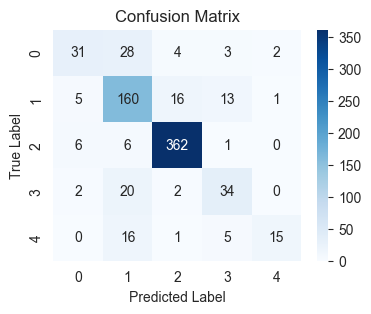

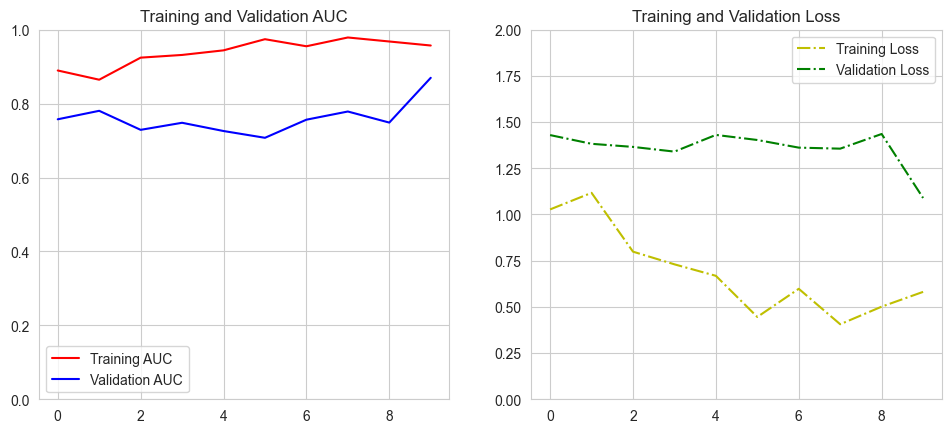

In [76]:
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC


# Confusion Matrix visualization
conf_matrix = confusion_matrix(np.asarray(original), np.asarray(prediction))
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Extracting the metrics using correct keys
auc = history.history['AUC']
val_auc = history.history['val_AUC']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the metrics
epochs = range(len(auc))
plt.figure(figsize=(18, 4.8))

# Plotting Training and Validation AUC
plt.subplot(1, 3, 1)
plt.plot(epochs, auc, 'r', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.ylim(0, 1)
plt.title('Training and Validation AUC')
plt.legend(loc=0)

# Plotting Training and Validation Loss
plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'y-.', label='Training Loss')
plt.plot(epochs, val_loss, 'g-.', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylim(0, 2)
plt.legend(loc=0)

plt.show()